In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white", color_codes = True)

In [ ]:
# Importar os datasets
train = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

In [ ]:
# Visualizar o dataset
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
# Quantas linhas e colunas temos no dataset?
train.shape

(76020, 371)

In [ ]:
# Como estão as variáveis do dataset?
""" Temos 111 variáves como float
E 260 variáveis como inteiros"""
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
# Temos valores nulos no dataset?
""" Não temos valore nulo no dataset!"""
train.isnull().sum()


ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [ ]:
# Quais os valores mais comuns para a variável var3?
""" 116 valores foram preenchidos com -999999 o que parece
ser um equívoco, por isso vamos substituir pelo o mais comum (2)"""
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [ ]:
# Substituir -999999 do var3 por 2
train["var3"] = train["var3"].replace(-999999, 2)
train.var3.value_counts()[:10]

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: var3, dtype: int64

In [ ]:
# Importante para classificação que as amostras dependente estejam balanceadas
# Visualizar a pct de amostras TARGET=0 (satisfeitos) e TARGET=1 (insatisfeitos)
""" Apenas 4% da amostra está insatisfeita com o Santander.
Este resultado demosntra que a amostra está desbalanceada!! """
pct_TARGET = pd.DataFrame(train.TARGET.value_counts())
pct_TARGET["PCT"] = 100*pct_TARGET.TARGET / train.TARGET.count()
pct_TARGET


,TARGET,PCT
0,73012,96.043147
1,3008,3.956853


In [ ]:
# TODO Add feature that counts the number of zeros in a row
X = train.iloc[:,:-1]
y = train.TARGET

X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

In [ ]:
# Quais os valores mais comuns para a variável num_var4?
""" Sugere ser a quantidade de produtos cada cliente possui no banco """
train.num_var4.value_counts()


1    38147
0    19528
2    12692
3     4377
4     1031
5      203
6       36
7        6
Name: num_var4, dtype: int64

<AxesSubplot:>

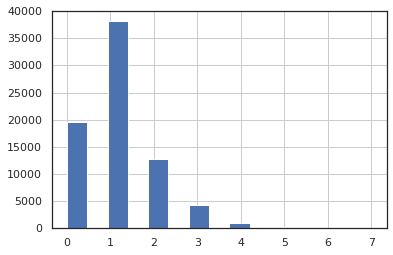

In [ ]:
# Ver a variável num_var4 em histograma
train.num_var4.hist(bins = 15)

In [ ]:
# Quantos clientes satisfeitos e insatisfeitos existem na variável num_var4?
num_var4 = train.groupby(by=["num_var4", "TARGET"])["num_var4"].agg(count="count").reset_index()
num_var4

,num_var4,TARGET,count
0,0,0,17791
1,0,1,1737
2,1,0,37455
3,1,1,692
4,2,0,12359
5,2,1,333
6,3,0,4195
7,3,1,182
8,4,0,973
9,4,1,58


<AxesSubplot:xlabel='num_var4', ylabel='count'>

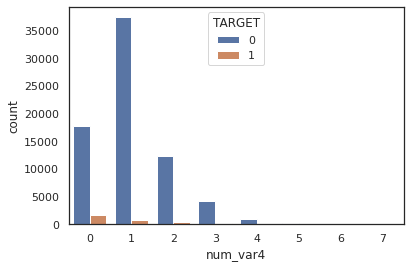

In [ ]:
# Gráfico de quants clientes TRAGET = 0 e TARGET = 1 no num_var4
sns.countplot(x = "num_var4", hue = "TARGET", data = train)

In [ ]:
# Var38 é uma variável númerica por isso vamos avaliar e ver o resumo descritivo
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

In [ ]:
# como é o resumo da var38 de acordo com o TARGET = 0 e TARGET = 1?
print(train.loc[train['TARGET']==0, 'var38'].describe()),
print(train.loc[train['TARGET']==1, 'var38'].describe())

count    7.301200e+04
mean     1.179592e+05
std      1.851009e+05
min      5.163750e+03
25%      6.843274e+04
50%      1.072078e+05
75%      1.197423e+05
max      2.203474e+07
Name: var38, dtype: float64
count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64


<AxesSubplot:>

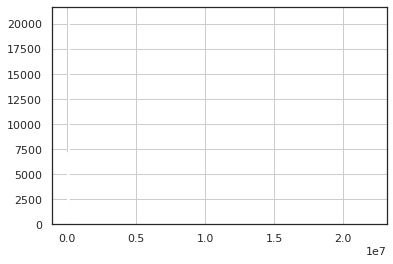

In [ ]:
# Como é o histograma da var38?
train.var38.hist(bins=1000, color = 'black')

<AxesSubplot:>

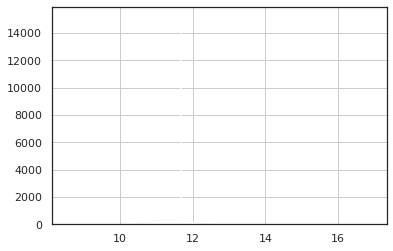

In [ ]:
train.var38.map(np.log).hist(bins=1000)

In [ ]:
# Qual o valor do pico que observamos entre 11 e 12?
train.var38.map(np.log).mode()

0    11.672584
dtype: float64

In [ ]:
# Quais os valores mais comuns da var38 ?
""" O valor 117310.979016 aparece 14868 vezes em var38"""
train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
                 ...  
89665.500000         1
45876.570000         1
151505.640000        1
74548.170000         1
84278.160000         1
Name: var38, Length: 57736, dtype: int64

In [ ]:
# Qual a média dos valores da var38 se excluirmos os valores mais comuns?
""" Surpreendentemente a média dos valores restante é similar do valor mais comum!!"""
train.var38[train['var38'] != 117310.979016494].mean()

117217.5333084768

<AxesSubplot:>

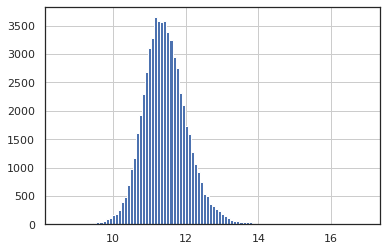

In [ ]:
# Como é o histograma da var38 se excluirmos os valores mais comumns?
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)

In [ ]:
# Devido ao resultado obtido ao separar os valores mais comuns da var38 do restante
# Vamos separar a var38 em duas novas variáveis
# var38mc == 1 quando var38 apresenta os valores mais comuns (117310.979016) ou 0 para o restante
X['var38mc'] = np.isclose(X.var38, 117310.979016)
# logvar38 será a variável transformada em log quando var38mc for 0 ou será zero
X['logvar38'] = X.loc[~X['var38mc'], 'var38'].map(np.log)
X.loc[X['var38mc'], 'logvar38'] = 0

In [ ]:
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[X['var38mc'], 'logvar38'] = 0

In [ ]:
# Checar se foi gerado alum valor NA
""" Não foi gerado valor NA nas transformações realizadas"""
X.var38mc.isnull().sum(), X.logvar38.isnull().sum()


(0, 0)

In [ ]:
# Var15 também é uma variável numérica por isso vamos avaliar e ver um resumo descritivo
""" Sugere-se que a var15 é a idade dos clientes"""
train.var15.describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

<AxesSubplot:>

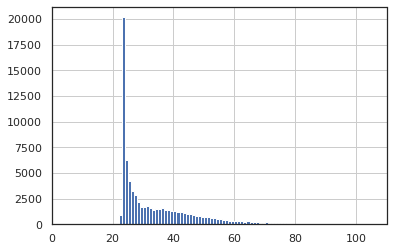

In [ ]:
# Visualiar o histograma da var15
train.var15.hist(bins=100)

<AxesSubplot:xlabel='var15', ylabel='Density'>

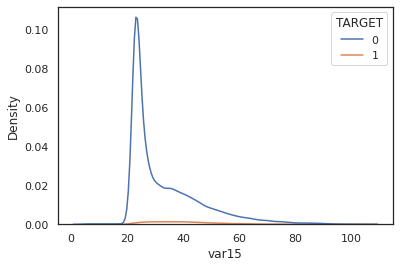

In [ ]:
# Avaliar a var15 de acordo com o TARGET=0 e TARGET=1
""" O gráfico sugere que os clientes mais velhos são os clientes mais insatisfeitos """
sns.kdeplot(x = "var15", hue = "TARGET", data = train)

<AxesSubplot:>

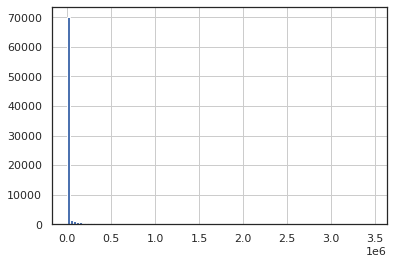

In [ ]:
# TODO Ver histograma da saldo_var30
train.saldo_var30.hist(bins=100)

<AxesSubplot:xlabel='log_saldo_var30', ylabel='Density'>

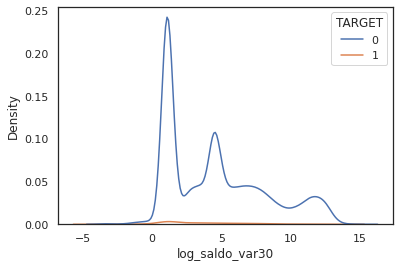

In [ ]:
# Visualizar o saldo_var30 de acordo com o TARGET
# Transformar o saldo_var30 em log para melhorar o gráfico
train['log_saldo_var30'] = train.saldo_var30.map(np.log)
sns.kdeplot(x = "log_saldo_var30", hue = "TARGET", data = train)

<AxesSubplot:xlabel='var38', ylabel='var15'>

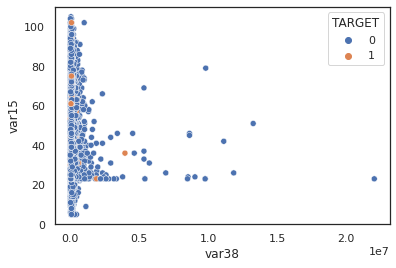

In [ ]:
# Visualizar a correlação entre var15 e var38
sns.scatterplot(x = "var38", y = "var15", hue = "TARGET", data = train)

<AxesSubplot:xlabel='logvar38', ylabel='var15'>

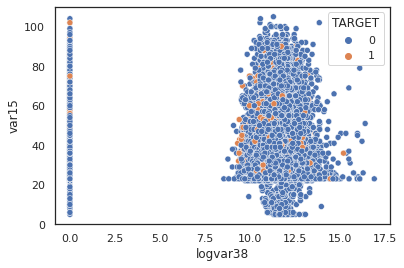

In [ ]:
# Visualizar a correlação entre var15 e logvar38
sns.scatterplot(x = "logvar38", y = "var15", hue = "TARGET", data = train)

<AxesSubplot:xlabel='logvar38', ylabel='var15'>

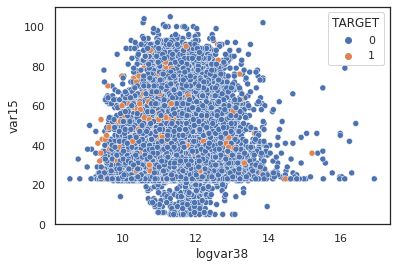

In [ ]:
# Visualizar a correlação entre var15 e logvar38 excluindo os valores comuns para var38
sns.scatterplot(x = "logvar38", y = "var15", hue = "TARGET", data = train[~train.var38mc])

<AxesSubplot:xlabel='var15', ylabel='Density'>

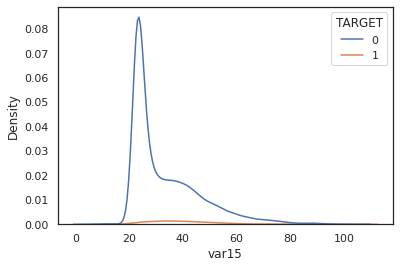

In [ ]:
# Qual a distribuição da var15 quando o var38 não representa os valores mais comuns?
sns.kdeplot(x = "var15", hue = "TARGET", data = train[train.var38mc])

<AxesSubplot:xlabel='n0', ylabel='Density'>

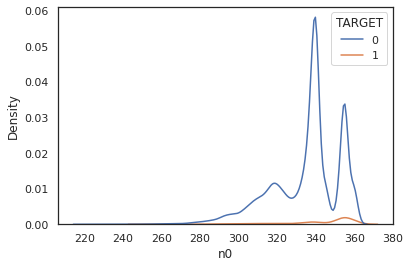

In [ ]:
# Qual a densidade de valores 0 (n0) no dataset?
sns.kdeplot(x = "n0", hue = "TARGET", data = train)

In [ ]:
# Quantos clientes por variável na var36 existem?
""" Maior dos clientes são var36 igual a 99"""
train['var36'].value_counts()


99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

<AxesSubplot:xlabel='var36', ylabel='Density'>

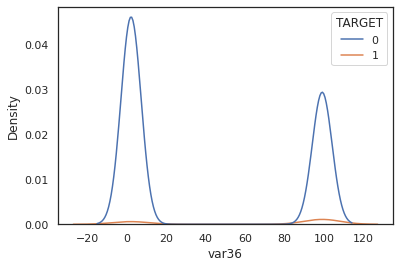

In [ ]:
# Como é o gráfico de densidade da var36 de acordo com o TARGET?
""" Se o var 36 for 0, 1, 2 ou 3 menor a satisfação dos clientes"""
sns.kdeplot(x = "var36", hue = "TARGET", data = train)

In [ ]:
# Quantos clientes por variável num_var5 existem?
train.num_var5.value_counts()

3     50265
0     25561
6       190
9         3
15        1
Name: num_var5, dtype: int64

In [ ]:
# Quantos clientes satisfeitos e insatisfeitos existem na variável num_var5?
num_var5 = train.groupby(by=["num_var5", "TARGET"])["num_var5"].agg(count="count").reset_index()
num_var5

,num_var5,TARGET,count
0,0,0,23602
1,0,1,1959
2,3,0,49223
3,3,1,1042
4,6,0,183
5,6,1,7
6,9,0,3
7,15,0,1


<AxesSubplot:xlabel='num_var5', ylabel='count'>

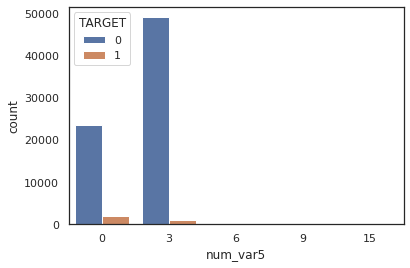

In [ ]:
# Avaliar no gráfico o num_var5 de acordo com o TARGET
sns.countplot(x = "num_var5", hue = "TARGET", data = train)

*Selecionando as variáveis mais importantes*

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn.preprocessing import Binarizer, scale, normalize
from sklearn.decomposition import PCA

In [ ]:
# Normaliza todas as variáveis independentes do dataset
X_normalized = normalize(X, axis=0)

# Transformar as variáveis em PCA com dois componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

In [ ]:
# ADicionar ao dataset X
X['PCA1'] = X_pca[:,0]
X['PCA2'] = X_pca[:,1]

In [76]:
# Padroniza o X e transorma o dataset em binário de 0 e 1
X_bin = Binarizer().fit_transform(scale(X))

In [77]:
# Selecionar variáeis por chi-squared
# Selecionar 3%  das variáveis com maior score
p = 50
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
# Selecionas as variáveis com maior score (apenas 3% das variáveis)
chi2_selected = selectChi2.get_support()
# Imprimir as variáveis que tiveram maior score no chi2
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),
    chi2_selected_features))

Chi2 selected 187 features ['var3', 'var15', 'imp_op_var39_comer_ult1', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_sal_var16_ult1', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var33_0', 'ind_var33', 'ind_var39_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', '

In [78]:
# Selecionar variáeis por ANOVA F-value
# Selecionar 3% das variáveis com maior score
p = 50
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)
# Selecionas as variáveis com maior score (apenas 3% das variáveis)
f_classif_selected = selectF_classif.get_support()
# Imprimir as variáveis que tiveram maior score no f_classif
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),
    f_classif_selected_features))

F_classif selected 187 features ['var3', 'var15', 'imp_op_var39_comer_ult1', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var30_0', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var33_0', 'ind_var33', 'ind_var39_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_v

In [79]:
# Selecionar e imprimir as variáveis com maior score presente nos dois testes
selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

Chi2 & F_classif selected 161 features
['var3', 'var15', 'imp_op_var39_comer_ult1', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var41_comer_ult1', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'ind_var1', 'ind_var5_0', 'ind_var5', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var30', 'ind_var31_0', 'ind_var31', 'ind_var33_0', 'ind_var33', 'ind_var39_0', 'ind_var40', 'ind_var41_0', 'ind_var39', 'ind_var44_0', 'ind_var44', 'num_var1', 'num_var4', 'num_var5_0', 'num_var5', 'num_var8_0', 'num_var8', 'num_var12_0', 'num_var12', 'num_var13_0', 'num_var13_corto_0', 'num_var13_corto', 'num_var13_la

In [80]:
# Criar novo dataset com as variáveis independentes selecionadas
X_sel = X[features]

In [81]:
X_sel

,var3,var15,imp_op_var39_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var41_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,...,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var33_hace2,var38,n0,PCA1,PCA2
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,39205.170000,355,-0.007616,-0.004434
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,240.75,0.0,0.0,0.0,0.0,0.0,49278.030000,329,-0.004890,0.027767
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,67333.770000,340,-0.006830,-0.003839
3,2,37,195.0,0.0,0.0,195.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,64007.970000,309,0.014251,-0.005360
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,117310.979016,319,0.004880,0.026589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,60926.490000,355,-0.007577,-0.004347
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,118634.520000,324,0.003571,0.020843
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,74028.150000,341,-0.006843,-0.003853
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,84278.160000,340,-0.006806,-0.003816


*SGDClassifier*

In [82]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [83]:
# Dividr o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, stratify=y, test_size=0.4)

In [84]:
# Treinar o modelo SGD
sgd = SGDClassifier(max_iter=5000, verbose = 1, n_jobs = -1, \
    learning_rate = 'constant', eta0 = 0.1, early_stopping = True, n_iter_no_change = 10)
sgd.fit(X_train, y_train)

-- Epoch 1
Norm: 962974899.33, NNZs: 159, Bias: 32.400000, T: 41050, Avg. loss: 1314386722398358.250000
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1361638953.62, NNZs: 161, Bias: 52.600000, T: 82100, Avg. loss: 1313524134230843.750000
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 905539881.64, NNZs: 161, Bias: 70.100000, T: 123150, Avg. loss: 1314350875768123.000000
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 602000298.80, NNZs: 161, Bias: 80.900000, T: 164200, Avg. loss: 1314628249276943.250000
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 404228514.97, NNZs: 161, Bias: 96.700000, T: 205250, Avg. loss: 1312028508751242.250000
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 271132718.99, NNZs: 161, Bias: 112.400000, T: 246300, Avg. loss: 1313469829188962.000000
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 182272912.04, NNZs: 161, Bias: 133.800000, T: 287350, Avg. loss: 1313968368062204.250000
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 12

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='constant',
              max_iter=5000, n_iter_no_change=10, n_jobs=-1, verbose=1)

In [85]:
# Avaliar com cross validation
treino_pred = cross_val_predict(sgd, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, treino_pred)
conf_mx

-- Epoch 1
Norm: 1979715.65, NNZs: 142, Bias: 11.200000, T: 27367, Avg. loss: 1314332732828948.250000
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 22435930.06, NNZs: 159, Bias: 20.900000, T: 54734, Avg. loss: 1305093220941175.000000
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 21756665.99, NNZs: 159, Bias: 33.800000, T: 82101, Avg. loss: 1313079255742540.500000
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 26968562.05, NNZs: 159, Bias: 44.000000, T: 109468, Avg. loss: 1310098214949461.000000
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 31250217.60, NNZs: 159, Bias: 55.500000, T: 136835, Avg. loss: 1309898281088953.000000
Total training time: 0.09 seconds.
-- Epoch 6
Norm: 1115958077.06, NNZs: 161, Bias: 68.300000, T: 164202, Avg. loss: 1311404830922391.750000
Total training time: 0.11 seconds.
-- Epoch 7
Norm: 848819238.81, NNZs: 161, Bias: 92.400000, T: 191569, Avg. loss: 1314646297215573.000000
Total training time: 0.13 seconds.
-- Epoch 8
Norm: 645712483.1

array([[43785,    22],
       [ 1805,     0]])

In [86]:
# Avaliar precisão, recall e f1
""" Os valores estão bem baixos !!! """
print("precision score:", precision_score(y_train, treino_pred))
print("recall score:", recall_score(y_train, treino_pred))
print("f1 score:", f1_score(y_train, treino_pred))

precision score: 0.0
recall score: 0.0
f1 score: 0.0


*XGBoost*

In [87]:
# Treinar o modelo com Gradiente Boosting
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier(n_estimators=1000, subsample=1, max_depth=10,\
    verbose=1)
xgb.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2998           11.95m
         2           0.2814           11.95m
         3           0.2660           11.99m
         4           0.2556           11.86m
         5           0.2461           11.82m
         6           0.2369           11.89m
         7           0.2291           11.90m
         8           0.2221           11.85m
         9           0.2164           11.85m
        10           0.2112           11.89m
        20           0.1723           10.96m
        30           0.1531           10.53m
        40           0.1414           10.54m
        50           0.1335           10.34m
        60           0.1251           10.24m
        70           0.1194           10.03m
        80           0.1146           10.02m
        90           0.1092           10.15m
       100           0.1052           10.13m
       200           0.0696            8.92m


KeyboardInterrupt: 

In [ ]:
# Avaliar com cross validation
treino_pred2 = cross_val_predict(xgb, X_train, y_train, cv=3)
conf_mx2 = confusion_matrix(y_train, treino_pred2)
conf_mx2

      Iter       Train Loss   Remaining Time 
         1           0.2962            7.13m
         2           0.2746            7.25m
         3           0.2588            7.25m
         4           0.2483            7.22m
         5           0.2397            7.19m
         6           0.2323            7.21m
         7           0.2242            7.21m
         8           0.2181            7.20m
         9           0.2123            7.20m
        10           0.2081            7.20m
        20           0.1619            7.10m
        30           0.1401            6.95m
        40           0.1291            6.85m
        50           0.1197            6.76m
        60           0.1127            6.69m
        70           0.1086            6.64m
        80           0.1044            6.67m
        90           0.0992            6.60m
       100           0.0945            6.53m
       200           0.0585            5.70m
       300           0.0393            4.87m
       40

array([[43460,   347],
       [ 1703,   102]])

In [ ]:
# Avaliar precisão do modelo
precision_score(y_train, treino_pred2)

0.22717149220489977

In [ ]:
# Avaliar recall do modelo
recall_score(y_train, treino_pred2)

0.056509695290858725

In [ ]:
# Avaliar f1 do modelo
f1_score(y_train, treino_pred2)

0.09050576752440107

      Iter       Train Loss   Remaining Time 
         1           0.2962            6.90m
         2           0.2768            7.05m
         3           0.2608            7.08m
         4           0.2506            7.07m
         5           0.2420            7.10m
         6           0.2343            7.11m
         7           0.2253            7.13m
         8           0.2187            7.14m
         9           0.2128            7.14m
        10           0.2073            7.15m
        20           0.1620            7.06m
        30           0.1400            6.87m
        40           0.1277            6.80m
        50           0.1215            6.52m
        60           0.1172            6.32m
        70           0.1129            6.27m
        80           0.1080            6.20m
        90           0.1018            6.14m
       100           0.0956            6.07m
       200           0.0588            5.28m
       300           0.0389            4.49m
       40

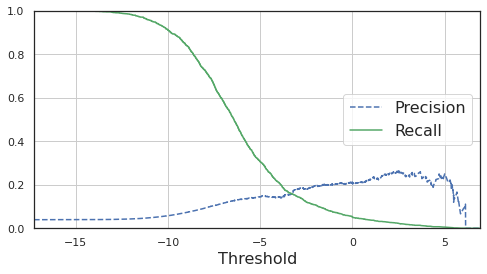

In [ ]:
y_scores = cross_val_predict(xgb, X_train, y_train, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([min(thresholds), max(thresholds), 0, 1])

# recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))   
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
# plt.plot([min(thresholds), threshold_90_precision], [0.9, 0.9], "r:")                                
# plt.plot([min(thresholds), threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
# plt.plot([threshold_90_precision], [0.9], "ro")                                             
# plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

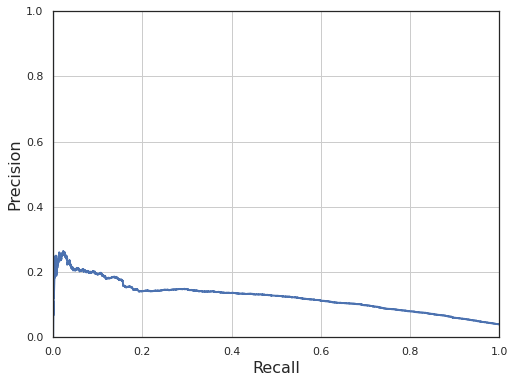

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

# recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
# plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
# plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
# plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

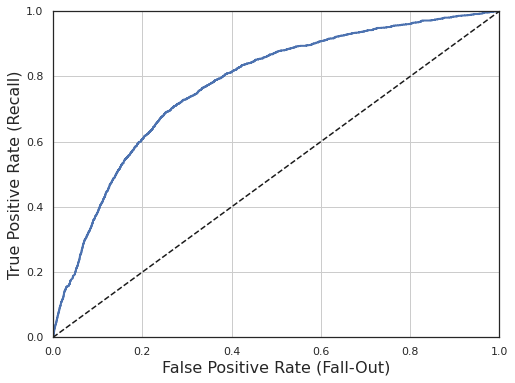

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
# fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
# plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
# plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
# plt.plot([fpr_90], [recall_90_precision], "ro")                                            
plt.show()

In [ ]:
# Avaliar a acurácia do modelo
""" Atingimos o objetivo do exercício de ter > 70% de acurácia !! """
roc_auc_score(y_train, y_scores)

0.7753346759555432

*Random Forest Classifier*

In [ ]:
# Treinar o modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, verbose=1)
rfc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


RandomForestClassifier(n_estimators=1000, verbose=1)

In [ ]:
# Avaliar com cross validation
treino_pred3 = cross_val_predict(rfc, X_train, y_train, cv=3)
conf_mx3 = confusion_matrix(y_train, treino_pred3)
conf_mx3

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   51.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


array([[43476,   331],
       [ 1714,    91]])

In [ ]:
# Avaliar precisão do modelo
precision_score(y_train, treino_pred3)

0.2156398104265403

In [ ]:
# Avaliar recall do modelo
recall_score(y_train, treino_pred3)

0.050415512465373964

In [ ]:
# Avaliar f1 do modelo
f1_score(y_train, treino_pred3)

0.08172429277054334

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   48.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   47.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   46.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


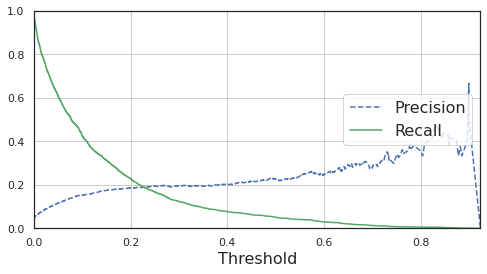

In [ ]:
y_scores3 = cross_val_predict(rfc, X_train, y_train, cv=3, method="predict_proba")

precisions3, recalls3, thresholds3 = precision_recall_curve(y_train, y_scores3[:,1])

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([min(thresholds), max(thresholds), 0, 1])

# recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))   
plot_precision_recall_vs_threshold(precisions3, recalls3, thresholds3)
# plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
# plt.plot([min(thresholds), threshold_90_precision], [0.9, 0.9], "r:")                                
# plt.plot([min(thresholds), threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
# plt.plot([threshold_90_precision], [0.9], "ro")                                             
# plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

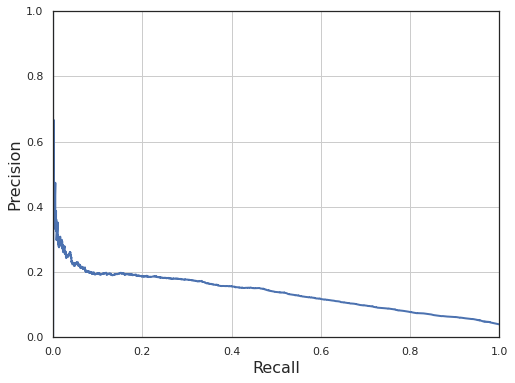

In [ ]:
# recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions3, recalls3)
# plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
# plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
# plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

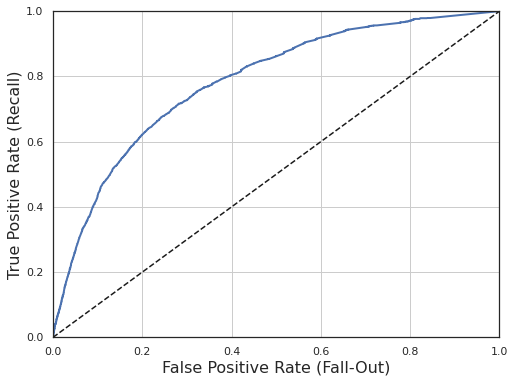

In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(y_train, y_scores3[:,1])

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr3, tpr3)
# fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
# plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
# plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
# plt.plot([fpr_90], [recall_90_precision], "ro")                                            
plt.show()

In [ ]:
# Avaliar acurácia do modelo
""" Também atingimos o objetivo do exercício de > 70% de acurácia"""
roc_auc_score(y_train, y_scores3[:,1])

0.7837338003697534

*Ada Boost Classifier*

In [ ]:
# Treinar o modelo de Ada Boost
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [ ]:
# Avaliar com cross validation
treino_pred4 = cross_val_predict(ada, X_train, y_train, cv=3)
conf_mx4 = confusion_matrix(y_train, treino_pred4)
conf_mx4

array([[43717,    90],
       [ 1785,    20]])

In [ ]:
# Avaliar precisão do modelo
precision_score(y_train, treino_pred4)

0.18181818181818182

In [ ]:
# Avaliar recall do modelo
recall_score(y_train, treino_pred4)

0.0110803324099723

In [ ]:
# Avaliar f1 do modelo
f1_score(y_train, treino_pred4)

0.020887728459530026

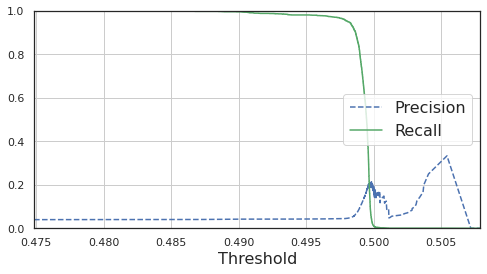

In [ ]:
y_scores4 = cross_val_predict(ada, X_train, y_train, cv=3, method="predict_proba")

precisions4, recalls4, thresholds4 = precision_recall_curve(y_train, y_scores4[:,1])

# recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))   
plot_precision_recall_vs_threshold(precisions4, recalls4, thresholds4)
# plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
# plt.plot([min(thresholds), threshold_90_precision], [0.9, 0.9], "r:")                                
# plt.plot([min(thresholds), threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
# plt.plot([threshold_90_precision], [0.9], "ro")                                             
# plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

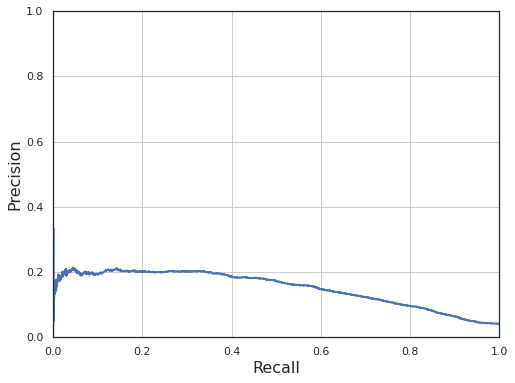

In [ ]:
# recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
# threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions4, recalls4)
# plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
# plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
# plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

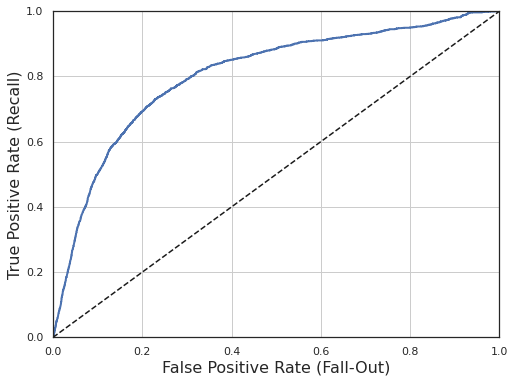

In [ ]:
fpr4, tpr4, thresholds4 = roc_curve(y_train, y_scores4[:,1])

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr4, tpr4)
# fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
# plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
# plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  
# plt.plot([fpr_90], [recall_90_precision], "ro")                                            
plt.show()

In [ ]:
# Avaliar acurácia do modelo
""" Objetivo atingido com 3 modelos!! """
roc_auc_score(y_train, y_scores4[:,1])

0.8051615032369066